In [ ]:
!pip install MDAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
u = mda.Universe(
    "/content/drive/MyDrive/jj/simul/step5_1.tpr",
    "/content/drive/MyDrive/jj/simul/centered.xtc",
)
ag = u.select_atoms("name CA")

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [ ]:
ca_poss = []
for ts in tqdm(u.trajectory):
    ca_poss.append(ag.positions)

ca_poss = np.array(ca_poss)

  0%|          | 0/10001 [00:00<?, ?it/s]

In [ ]:
ca_poss.shape

(10001, 549, 3)

In [ ]:
rgyr = []
time = []
protein = u.select_atoms("protein")  ##protein
for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(protein.radius_of_gyration())

In [ ]:
import pandas as pd

rgyr_df = pd.DataFrame(rgyr, columns=["Radius of gyration (A)"], index=time)
rgyr_df.index.name = "Time (ps)"

rgyr_df.head()

Radius of gyration (A)
Time (ps)                        
0.0                     21.477475
10.0                    21.546591
20.0                    21.546411
30.0                    21.540754
40.0                    21.546202

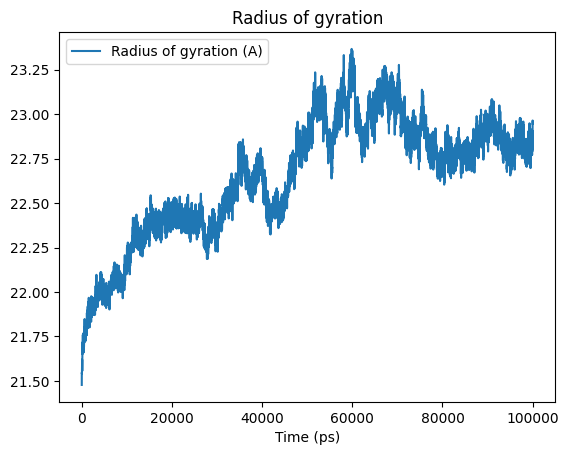

In [ ]:
rgyr_df.plot(title="Radius of gyration")
plt.show()

In [ ]:
ca_poss.shape

(10001, 549, 3)

In [ ]:
ca_poss = ca_poss[::10]

In [ ]:
ca_poss.shape

(1001, 549, 3)

## pca 2 component

In [ ]:
pca = PCA(n_components=2)
ca_poss.shape

(1001, 549, 3)

In [ ]:
principal_components = pca.fit_transform(ca_poss.reshape((ca_poss.shape[0], 549 * 3)))

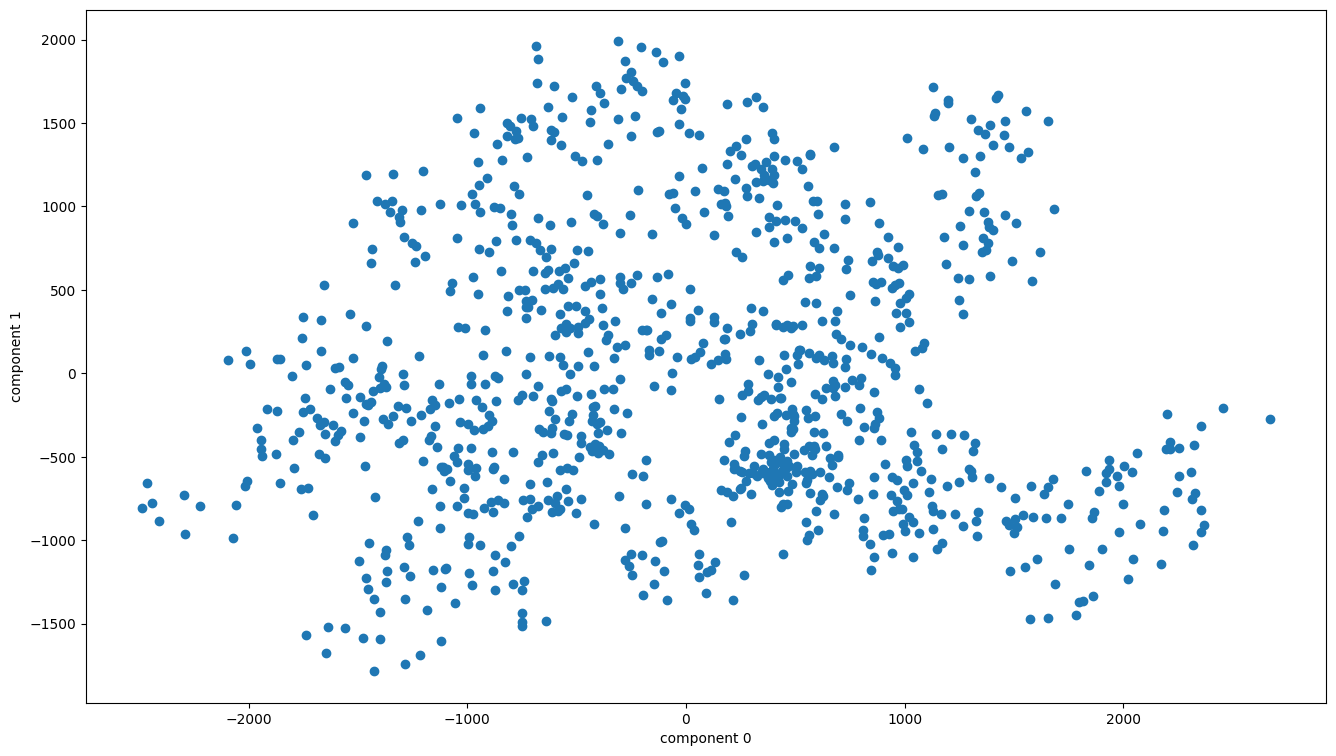

In [ ]:
%matplotlib inline
plt.figure(figsize=(16, 9))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("component 0")
plt.ylabel("component 1");

In [ ]:
principal_components.shape

(1001, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.4853555 , 0.32633677], dtype=float32)

## TSNE 2 component

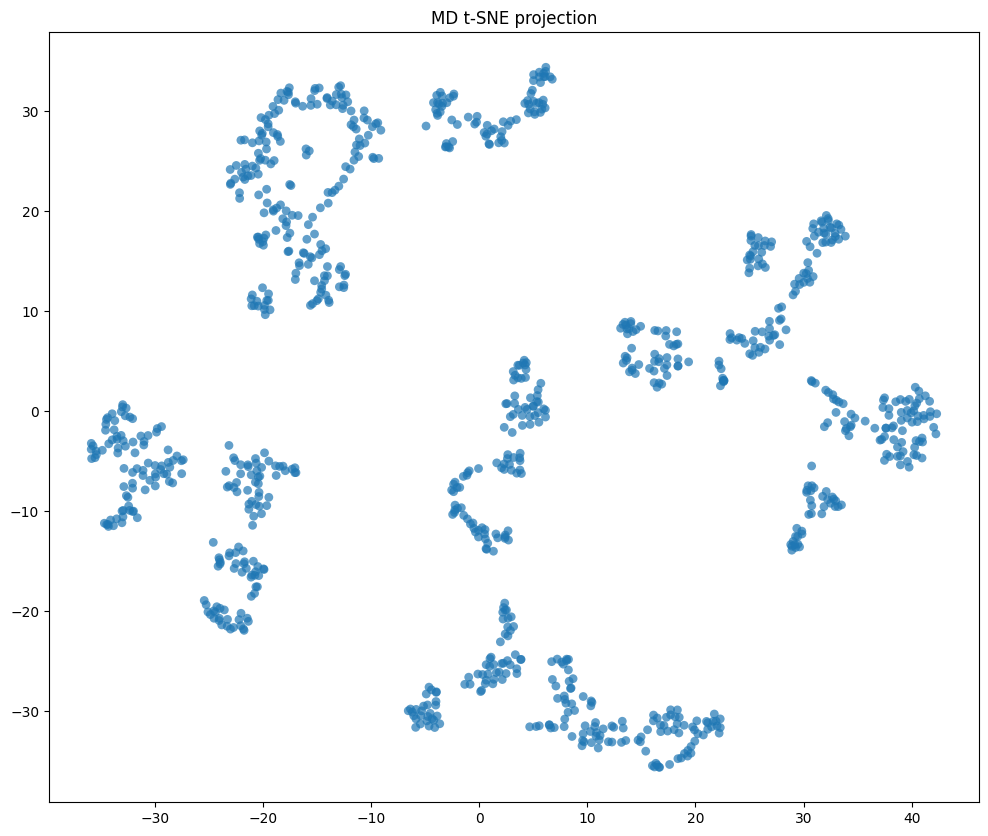

In [ ]:
tsne = TSNE(random_state=1, n_components=2)

projected_tsne = tsne.fit_transform(ca_poss.reshape((ca_poss.shape[0], 549 * 3)))

%matplotlib inline

plt.figure(figsize=(12, 10))
plt.title("MD t-SNE projection")
plt.scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], edgecolor="none", alpha=0.7, s=40
);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_title("FUS PCA")
ax[0].scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    edgecolor="none",
    alpha=0.8,
    s=15,
)

ax[1].set_title("FUS t-SNE")
ax[1].scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], edgecolor="none", alpha=0.8, s=15
);

NameError: name 'plt' is not defined

In [ ]:
def out_move_percent(cl):
    n = len(cl)
    on = 0
    for i in range(1, len(cl)):
        if cl[i] != cl[i - 1]:
            on += 1
    return on / n * 100

## 2 component kmean

In [ ]:
intertias = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=0)
    clusters = kmeans.fit_predict(projected_tsne)
    intertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

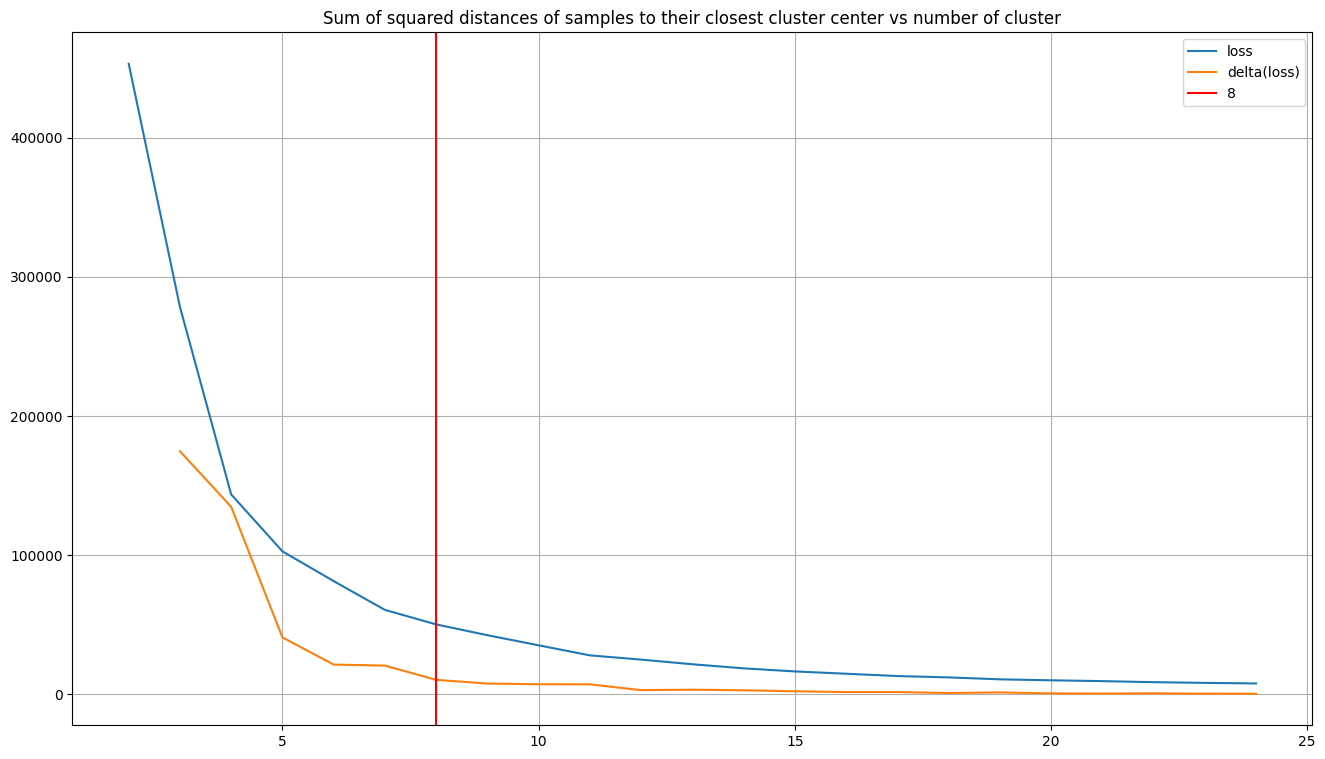

In [ ]:
%matplotlib inline

plt.figure(figsize=(16, 9))
plt.title(
    "Sum of squared distances of samples to their closest cluster center vs number of cluster"
)
plt.plot(range(2, 25), intertias, label="loss")
plt.plot(range(3, 25), -np.diff(intertias), label="delta(loss)")
plt.axvline(8, label="8", c="r")
plt.grid()
plt.legend();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


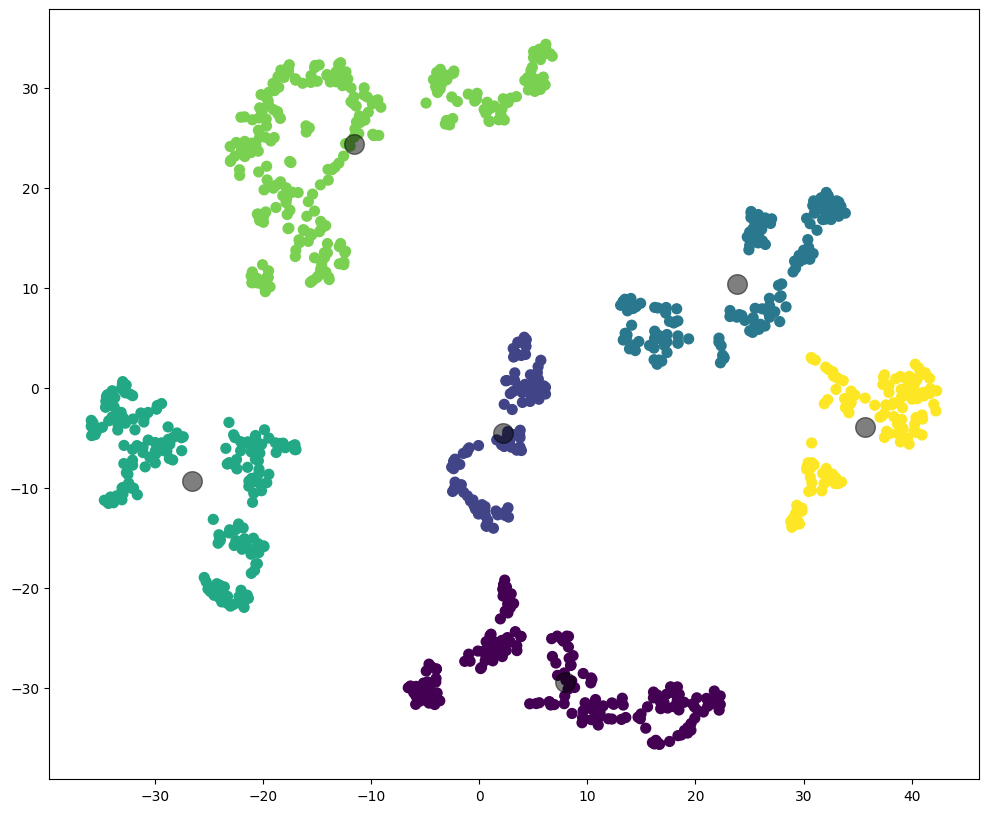

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(projected_tsne)

%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], c=clusters, s=50, cmap="viridis"
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

In [ ]:
out_move_percent(clusters)

0.6993006993006993

## 2 component gmm

In [ ]:
bics = []
aics = []
losses = []
for i in tqdm(range(2, 40)):
    model = GaussianMixture(n_components=i, random_state=0)
    clusters = model.fit_predict(projected_tsne)
    bics.append(model.bic(projected_tsne))
    aics.append(model.aic(projected_tsne))
    losses.append(model.score(projected_tsne))

  0%|          | 0/38 [00:00<?, ?it/s]

Text(0, 0.5, 'Score')

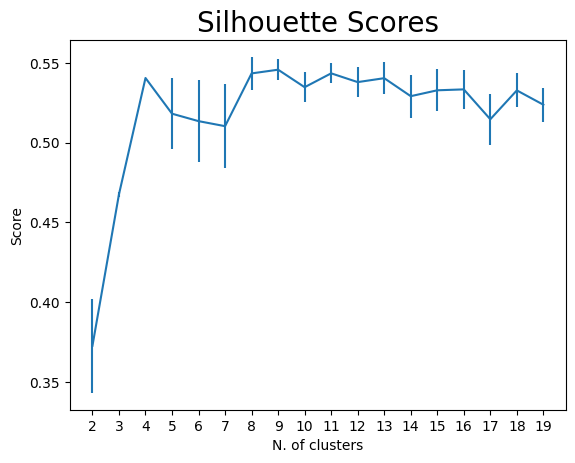

In [ ]:
from sklearn import metrics


def SelBest(arr: list, X: int) -> list:
    """
    returns the set of X configurations with shorter distance
    """
    dx = np.argsort(arr)[:X]
    return arr[dx]


n_clusters = np.arange(2, 20)
sils = []
sils_err = []
iterations = 20
for n in n_clusters:
    tmp_sil = []
    for _ in range(iterations):
        gmm = GaussianMixture(n, n_init=2).fit(projected_tsne)
        labels = gmm.predict(projected_tsne)
        sil = metrics.silhouette_score(projected_tsne, labels, metric="euclidean")
        tmp_sil.append(sil)
    val = np.mean(SelBest(np.array(tmp_sil), int(iterations / 5)))
    err = np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

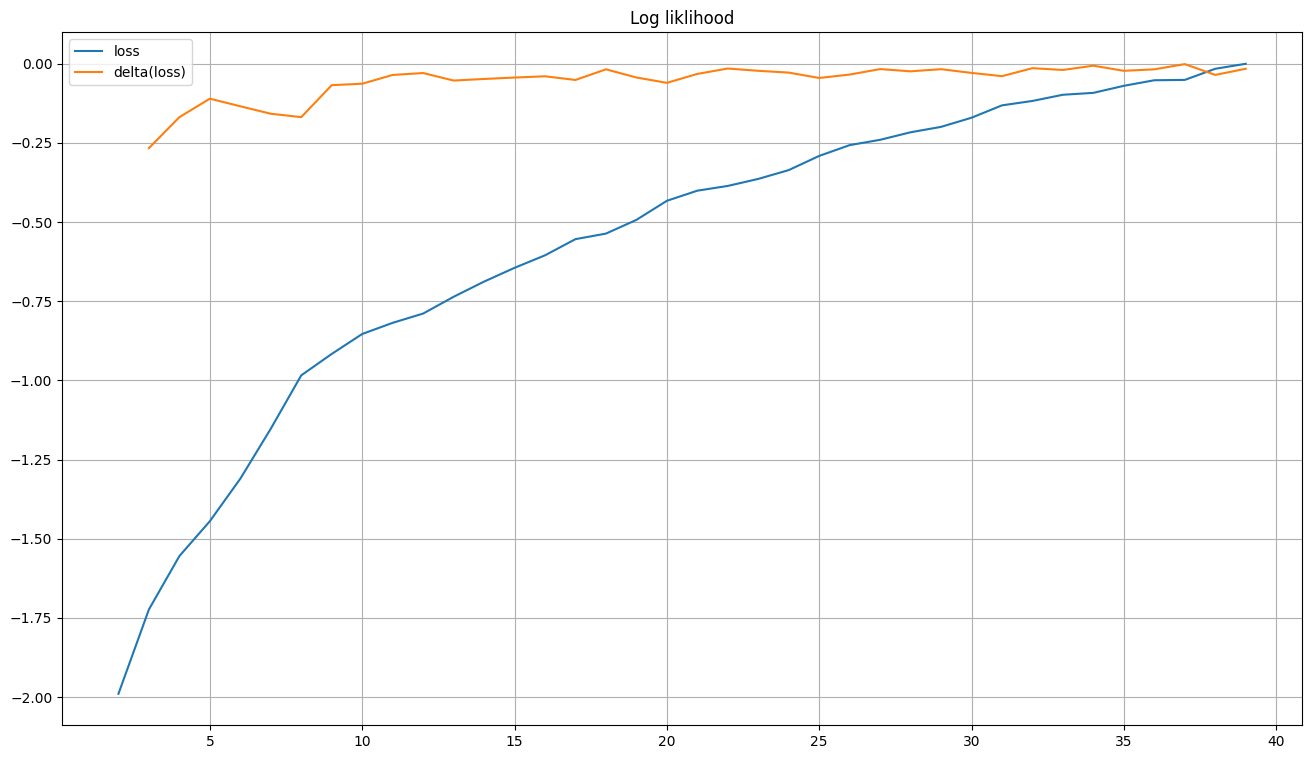

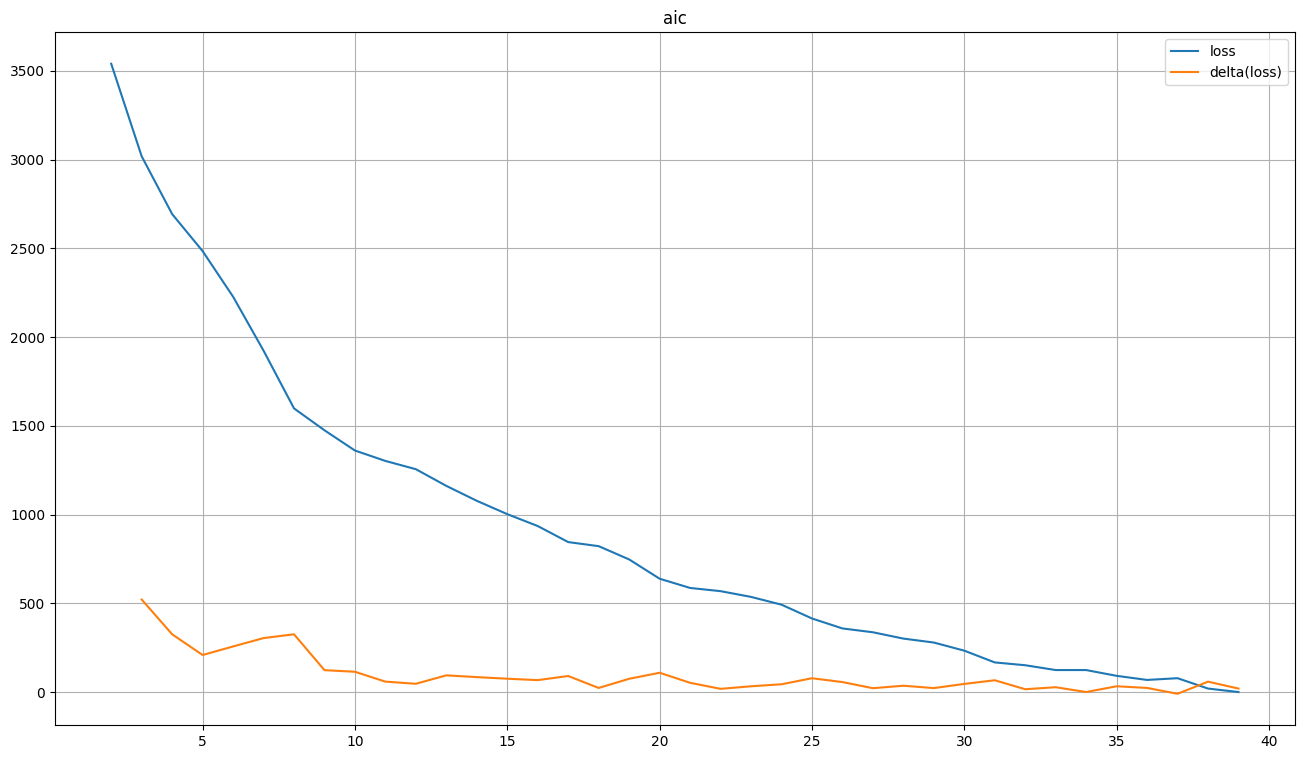

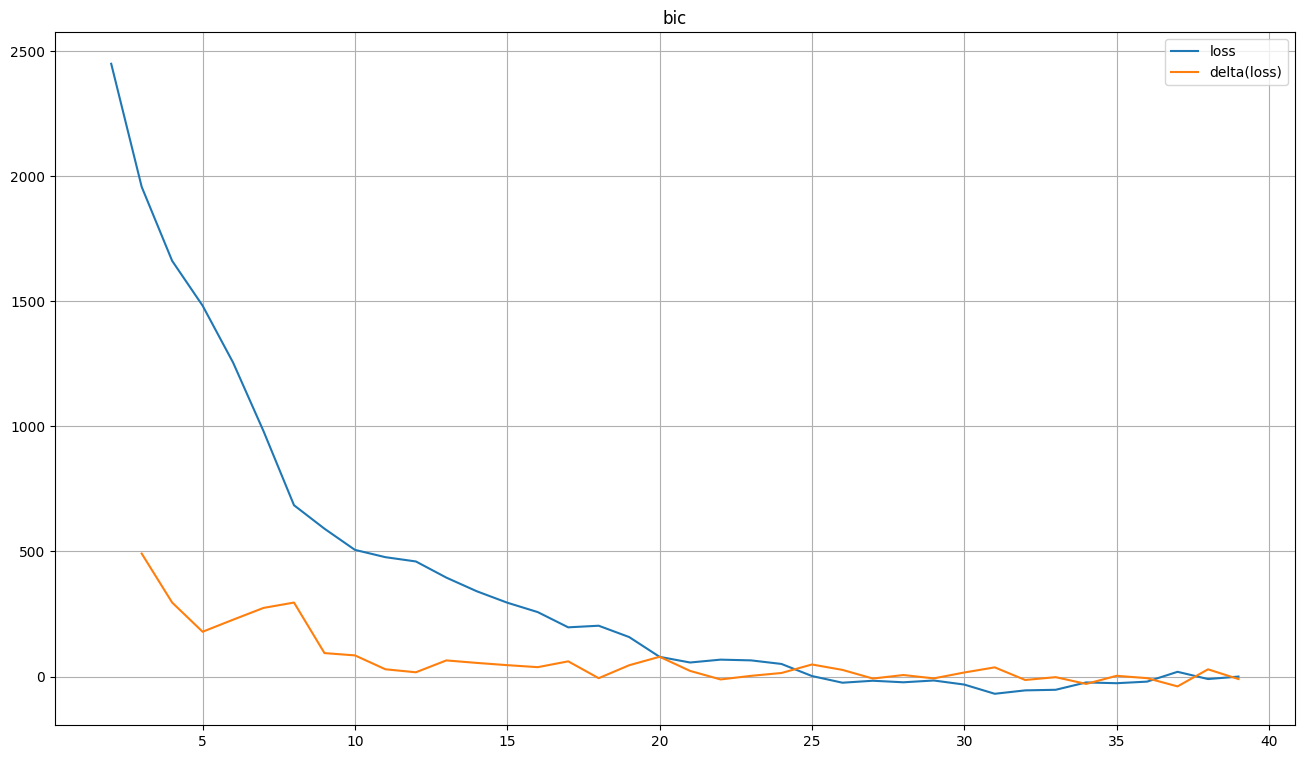

In [ ]:
%matplotlib inline

plt.figure(figsize=(16, 9))
plt.title("Log liklihood")
plt.plot(range(2, 40), losses - losses[-1], label="loss")
plt.plot(range(3, 40), -np.diff(losses), label="delta(loss)")
plt.grid()
plt.legend()
plt.figure(figsize=(16, 9))
plt.title("aic")
plt.plot(range(2, 40), aics - aics[-1], label="loss")
plt.plot(range(3, 40), -np.diff(aics), label="delta(loss)")
plt.grid()
plt.legend()
plt.figure(figsize=(16, 9))
plt.title("bic")
plt.plot(range(2, 40), bics - bics[-1], label="loss")
plt.plot(range(3, 40), -np.diff(bics), label="delta(loss)")
plt.grid()
plt.legend();

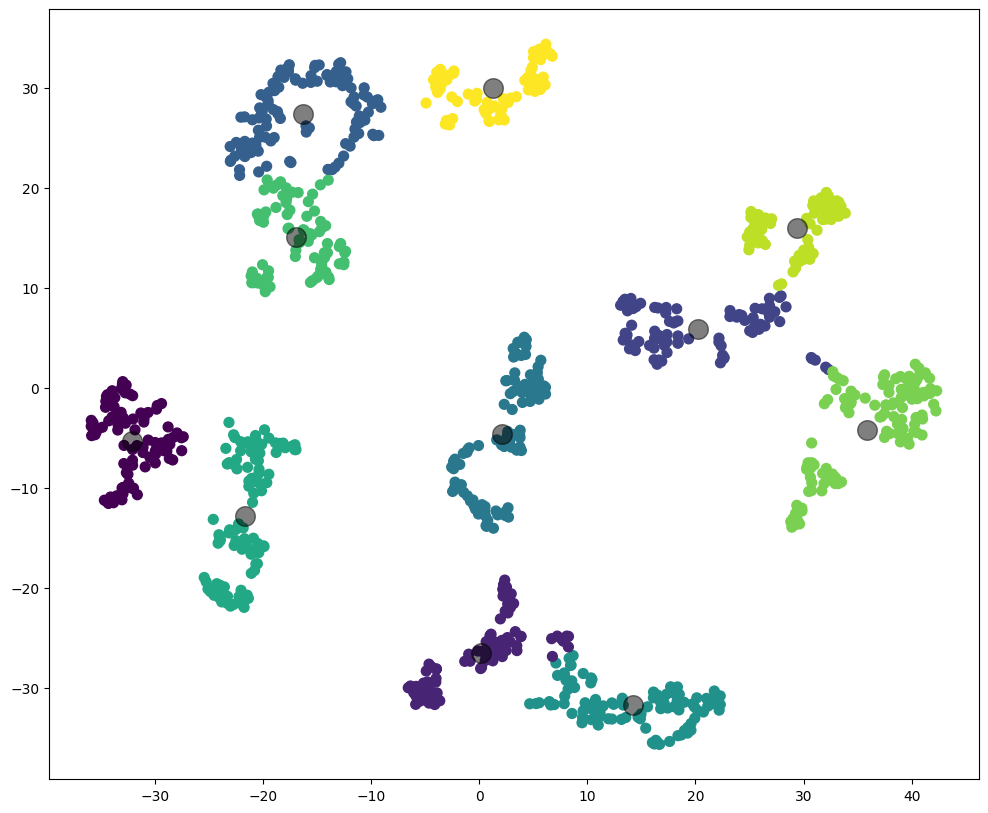

In [ ]:
model = GaussianMixture(n_components=11, random_state=0)
clusters = model.fit_predict(projected_tsne)

%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], c=clusters, s=50, cmap="viridis"
)
centers = model.means_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

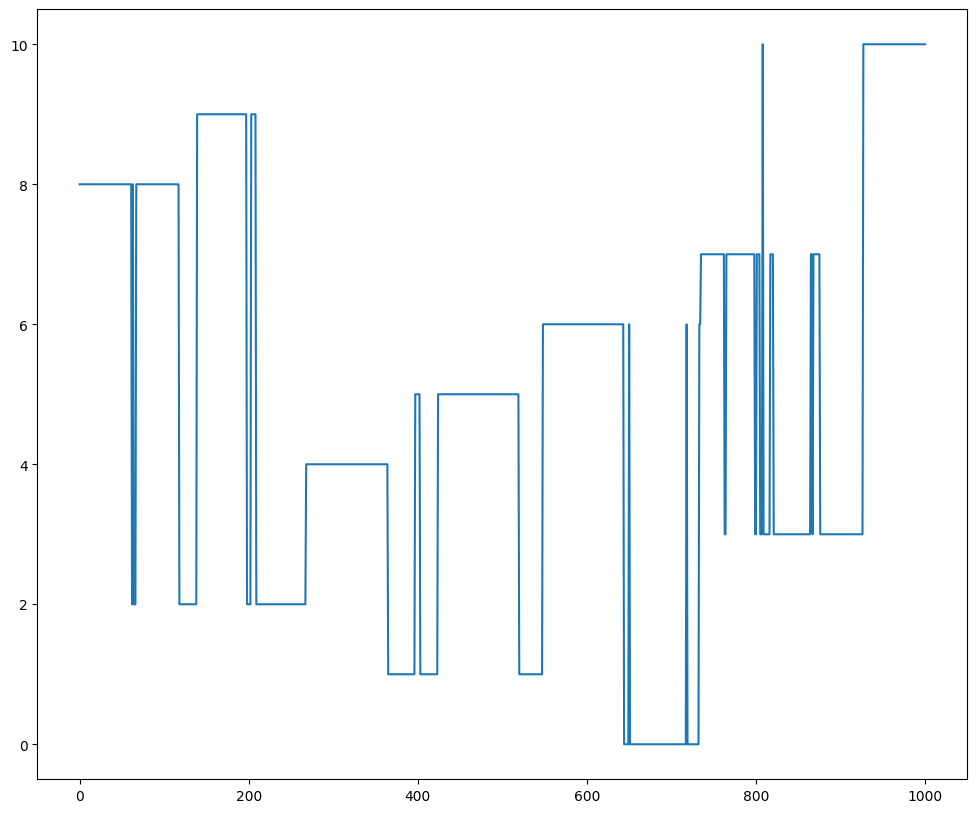

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.plot(clusters);

In [ ]:
out_move_percent(clusters)

3.696303696303696

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


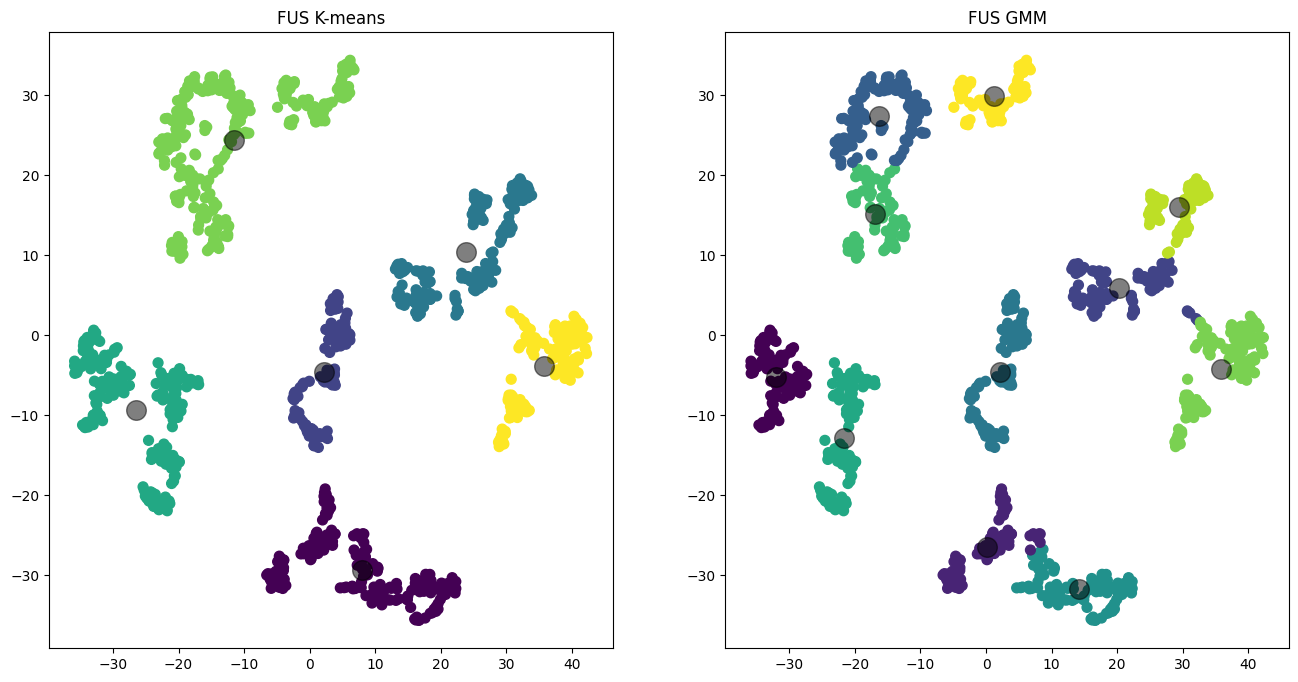

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_title("FUS K-means")

clusters = kmeans.fit_predict(projected_tsne)


ax[0].scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], c=clusters, s=50, cmap="viridis"
)
centers = kmeans.cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
ax[1].set_title("FUS GMM")

clusters = model.fit_predict(projected_tsne)

ax[1].scatter(
    projected_tsne[:, 0], projected_tsne[:, 1], c=clusters, s=50, cmap="viridis"
)
centers = model.means_
ax[1].scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

## pca 3 component

In [ ]:
pca = PCA(n_components=3)

In [ ]:
principal_components = pca.fit_transform(ca_poss.reshape((ca_poss.shape[0], 549 * 3)))

In [ ]:
principal_components.shape

(1001, 3)

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    principal_components[:800, 0],
    principal_components[:800, 1],
    principal_components[:800, 2],
)
plt.xlabel("component 0")
plt.ylabel("component 1")
# plt.ylabel("component 2");

<IPython.core.display.Javascript object>

Text(0.5, 0.5, 'component 1')

In [ ]:
pca.explained_variance_ratio_

array([0.48535544, 0.32633665, 0.12284613], dtype=float32)

## TSNE 3 component

In [ ]:
tsne = TSNE(random_state=17, n_components=3)

projected_tsne = tsne.fit_transform(ca_poss.reshape((ca_poss.shape[0], 549 * 3)))

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(projected_tsne[:, 0], projected_tsne[:, 1], projected_tsne[:, 2])
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.ylabel("component 2");

<IPython.core.display.Javascript object>

In [ ]:
intertias = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=0)
    clusters = kmeans.fit_predict(projected_tsne)
    intertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

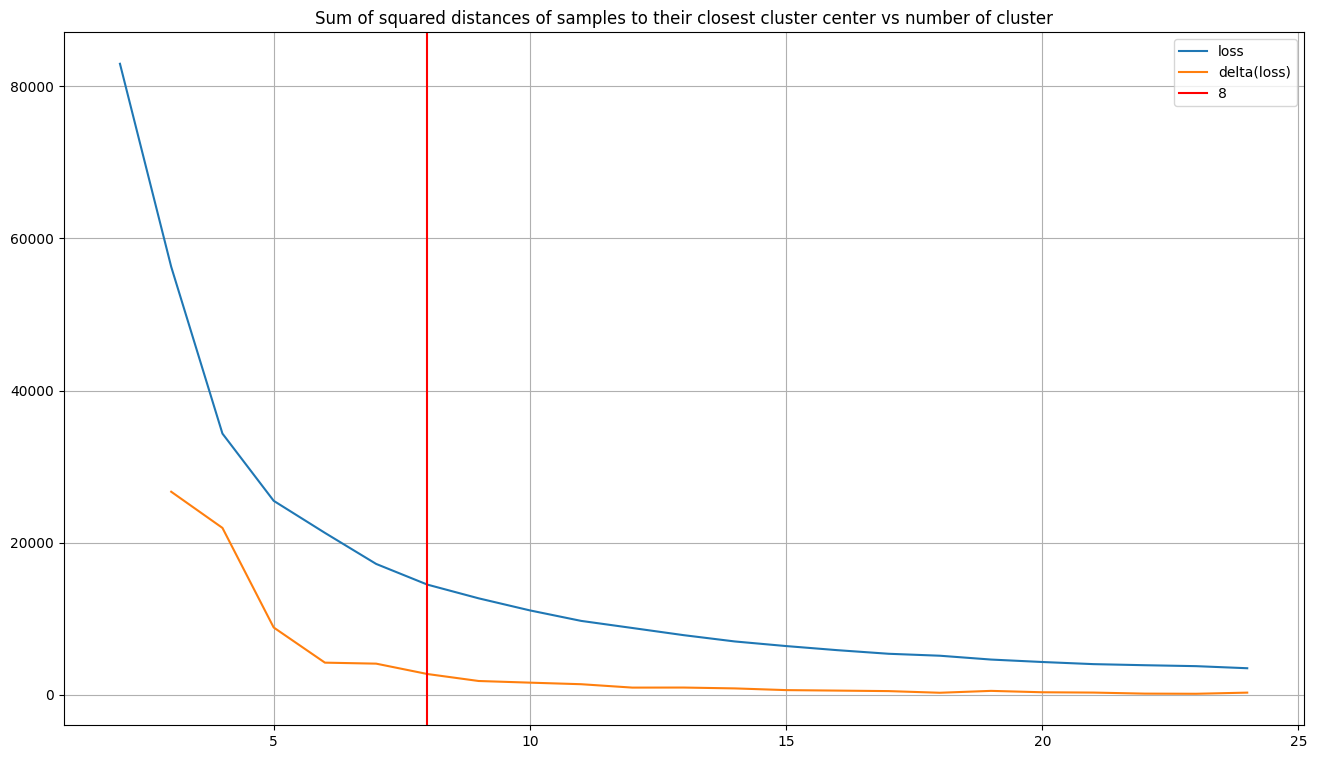

In [ ]:
%matplotlib inline

plt.figure(figsize=(16, 9))
plt.title(
    "Sum of squared distances of samples to their closest cluster center vs number of cluster"
)
plt.plot(range(2, 25), intertias, label="loss")
plt.plot(range(3, 25), -np.diff(intertias), label="delta(loss)")
plt.axvline(8, label="8", c="r")
plt.grid()
plt.legend();

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(projected_tsne)
kmeans.cluster_centers_.shape

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    projected_tsne[:, 0],
    projected_tsne[:, 1],
    projected_tsne[:, 2],
    c=clusters,
    s=50,
    cmap="viridis",
)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c="black", s=200, alpha=0.5);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>